RESET!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
RESET!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
RESET!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!1 1


KeyboardInterrupt: 

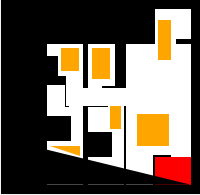

In [1]:
from continuous_environment import GymEnv, Robot

from stable_baselines3 import PPO

env = GymEnv(
    configFile="example-env.json",
    robots=[Robot(id=1, radius=0.1, color="blue", batteryLevel=100)],
    startingPos=[[8, 5]],
    save=True
)

model = PPO("CnnPolicy", env, verbose=1)
model.learn(total_timesteps=1, eval_log_path="eval", eval_freq=1)

obs = env.reset()
for i in range(1000):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()
    if done:
      obs = env.reset()

env.close()